In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
import json
import os, os.path
from scipy.spatial import distance

In [2]:
lista = os.listdir("outputs/2-e/clust1/")
lista

['load_dist_10vehicles.txt',
 'load_dist_11vehicles.txt',
 'load_dist_12vehicles.txt',
 'load_dist_13vehicles.txt',
 'load_dist_14vehicles.txt',
 'load_dist_15vehicles.txt',
 'load_dist_16vehicles.txt',
 'load_dist_17vehicles.txt',
 'load_dist_1vehicles.txt',
 'load_dist_2vehicles.txt',
 'load_dist_3vehicles.txt',
 'load_dist_4vehicles.txt',
 'load_dist_5vehicles.txt',
 'load_dist_6vehicles.txt',
 'load_dist_7vehicles.txt',
 'load_dist_8vehicles.txt',
 'load_dist_9vehicles.txt',
 'route']

# Storing all the results in a dictionary

In [3]:
"""Clu : Number of vehicles used for the optimization for the clusters"""

clu1 = 5 
clu2 = 4 
clu3 = 4  
clu4 = 4 
clu5 = 7 
clu6 = 7 
clu7 = 7 
clu8 = 7 
c = [f"clu{i}" for i in range (1,9)]
clus = [clu1,clu2,clu3,clu4,clu5,clu6,clu7,clu8]
first_echelon = 30
data = {}

In [11]:
# data = {}
data["cluster8"] = {"coordinates": {}, "route":{}} #have to do this for all clusters
for i in range(clu8):
    #Coordinates part of the cluster
    coordinates = pd.read_csv("2-e/clustering/cluster8.csv")[["latitude","longitude"]]
    coordinates_x = coordinates["latitude"].tolist()
    coordinates_y = coordinates["longitude"].tolist()
    data["cluster8"]["coordinates"]["x"] = coordinates_x
    data["cluster8"]["coordinates"]["y"] = coordinates_y
    
    
    route = pd.read_csv(f"outputs/2-e/clust8/route/route_vehicle{i}.txt")
    #Formatting the CVRP results from cvrp_fyv.py
    a = [i.strip() for i in route.iloc[0,0].split("->")]  
    b = [i.split(" ") for i in a]
    data["cluster8"]["route"][f"vehicle{i}"] = {"points":[],"demand":[]}
    print(i)
    for j in b:
        data["cluster8"]["route"][f"vehicle{i}"]["points"].append(int(j[0]))
        data["cluster8"]["route"][f"vehicle{i}"]["demand"].append(int(j[1][5:-1]))  
    
    """THE DEMAND IS ACCUMULATIVE (ITS NOT THE DEMAND OF THE INDIVIDUAL POINTS, BUT RATHER SHOWS HOW THE
    CAPACITY OF THE TRUCK IS BEING FILLED"""

0
1
2
3
4
5
6


In [12]:
#APPENDING THE FIRST ECHELON RESULTS
data["first_echelon"] = {"coordinates": {},"route":{}}
for i in range(first_echelon):
    #Coordinates part of the cluster
    coordinates = pd.read_csv("outputs/data.csv")[["latitude","longitude"]]
    coordinates_x = coordinates["latitude"].tolist()
    coordinates_y = coordinates["longitude"].tolist()
    data["first_echelon"]["coordinates"]["x"] = coordinates_x
    data["first_echelon"]["coordinates"]["y"] = coordinates_y
    
    route = pd.read_csv(f"outputs/1-e/route/route_vehicle{i}.txt")
    a = [i.strip() for i in route.iloc[0,0].split("->")]  
    b = [i.split(" ") for i in a]
    data["first_echelon"]["route"][f"vehicle{i}"] = {"points":[],"demand":[]}
    for j in b:
        data["first_echelon"]["route"][f"vehicle{i}"]["points"].append(int(j[0]))
        data["first_echelon"]["route"][f"vehicle{i}"]["demand"].append(int(j[1][5:-1]))  
    

In [13]:
data.keys()

dict_keys(['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'cluster7', 'cluster8', 'first_echelon'])

In [14]:
# Save the data as a json file

with open("outputs/dictionary_results.json","w") as file:
    json.dump(data,file)

# Plotting the results of the CVRP


In [17]:

def plot_cvrp(cluster):
    prueba = data[cluster]["route"]
#     color_count = 0
#     count = 0
    color = ["r","b","y","g","c","k","m"]
    for vehicle in range(0,len(prueba.keys())):
#         color_count+=1
        for i in prueba[f"vehicle{vehicle}"]["points"]:
            temp = data[cluster]["coordinates"]
            plt.plot(temp["x"][i:i+2],temp["y"][i:i+2],"ro-",color = color[vehicle])
#             count+=1
    plt.title(f"Cluster {cluster[-1]}")
    plt.plot(temp["x"][0],temp["y"][0],marker = "o", markersize = 15)
    plt.show()


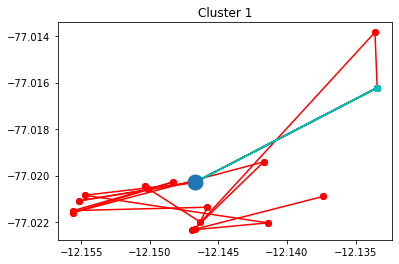

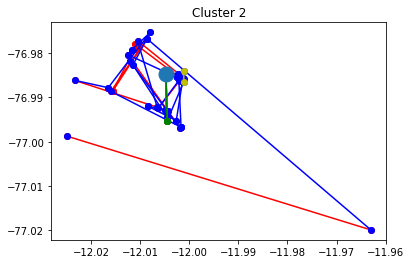

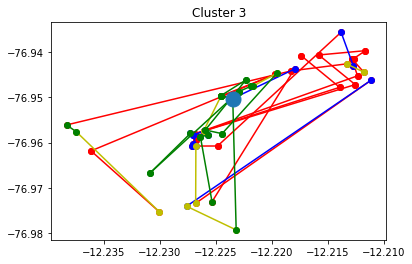

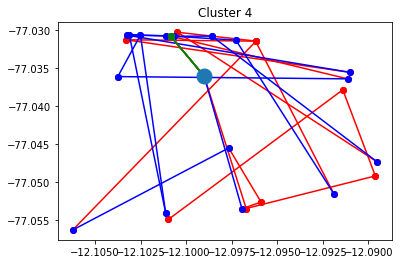

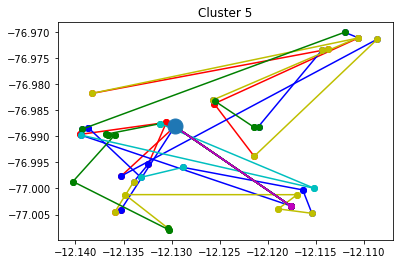

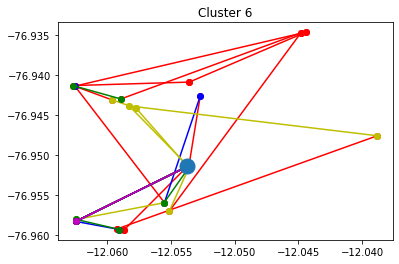

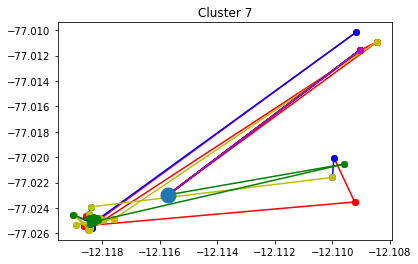

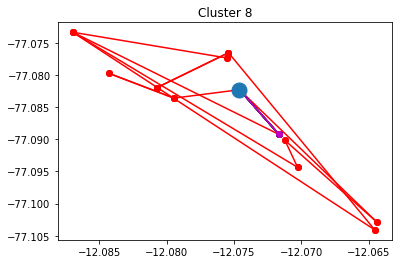

In [18]:
for i in range (1,9):
    plot_cvrp(F"cluster{i}")

# Analyze the results 

In [15]:
#Cost of the route (per cluster and 2E) and total capacity of the routes
def load_cost(cluster):
    lista = os.listdir(f"outputs/2-e/{cluster}/")
    cost = []
    load = []
    vehicles = []
    for i in lista:
        try:
            temp = pd.read_csv(f"outputs/2-e/{cluster}/{i}", sep = ",").columns
            cost.append(int(temp[1])/100)
            load.append(int(temp[0]))
            vehicles.append(i)
        except:
            pass
#             print("no funciona")
    return pd.DataFrame({"vehicles":vehicles,"cost":cost,"load":load})

c1 = load_cost("clust1")
c2 = load_cost("clust2")
c3 = load_cost("clust3")
c4 = load_cost("clust4")
c5 = load_cost("clust5")
c6 = load_cost("clust6")
c7 = load_cost("clust7")
c8 = load_cost("clust8")
first_phase = load_cost("1st_phase")  #THIS ONE IS ALREDY ON DOLLARS
clusters = [c1,c2,c3,c4,c5,c6,c7,c8]

In [16]:
#Unsatisfied demand? (nope)


In [17]:
#COST OF ACTUAL DISTRIBUTION STRATEGY
data = pd.read_csv("outputs/data.csv")

def taxi_price(x):
    return 0.31*x["Time to market (mins)"] + 1.31*((x["distance_to_market"])/1000)


data["Taxi price"] = data.apply(taxi_price,axis = 1)
data[data["Taxi price"] < 10] = 10
data["Taxi price"].fillna(0,inplace = True)
cost_actual = ((data["Taxi price"].sum())*2)/3.3

In [18]:
#COST FOR 1-E
lista = os.listdir(f"outputs/1-e/")
cost = []
load = []
vehicles = []
for i in range (0,len(lista)):
    try:
        temp = pd.read_csv(f"outputs/1-e/load_dist_{i}vehicles.txt", sep = ",").columns
        cost.append(int(temp[1])/100)
        load.append(int(temp[0]))
        vehicles.append(i)
    except:
        pass
#             print("no funciona")
first_echelon = pd.DataFrame({"vehicles":vehicles,"cost":cost,"load":load})

In [19]:
cost_1e =(first_echelon[first_echelon.load == 11254].iloc[1,1])/3.3

In [20]:
#COST FOR 2-E

#first stage
first_phase.cost

#second stage
cost_sec_stage = 0  #cost
load_sec_stage = 0
for i in clusters:
    cost_sec_stage+= ((i.iloc[8,1])/3.3)
    load_sec_stage += i.iloc[1,2]

    
    
two_echelon_cost = first_phase.cost.mean() + cost_sec_stage

# Conclusions

In [21]:
print(f"""

The results are:
Actual distribution costs: {cost_actual.round()}$
For the 2-E distribution strategy: {two_echelon_cost.round()}$ (beacuse high cost of distribution to satelites)
For the 1-E distribution strategy : {cost_1e.round()}$

""")





The results are:
Actual distribution costs: 1632.0$
For the 2-E distribution strategy: 1585.0$ (beacuse high cost of distribution to satelites)
For the 1-E distribution strategy : 948.0$




In [49]:
#Total vehicles (1E VS 2E )
"""
First_echelon = 21
Cluster 1 = 1
Cluster 2 = 3
Cluster 3 = 4
Cluster 4 = 2
Cluster 5 = 5
Cluster 6 = 4
Cluster 7 = 4
Cluster 8 = 1
First phase (2-E) = 4

"""

'\nFirst_echelon = 21\nCluster 1 = 1\nCluster 2 = 3\nCluster 3 = 4\nCluster 4 = 2\nCluster 5 = 5\nCluster 6 = 4\nCluster 7 = 4\nCluster 8 = 1\n\n'

EXECUTION TIME

1-E:   46.14 s/it


2-E:

    First phase: 17.76 it/s
    Cluster 1:
    Cluster 2:
    Cluster 3:
    Cluster 4:
    Cluster 5:
    Cluster 6:
    Cluster 7:
    Cluster 8:
    


